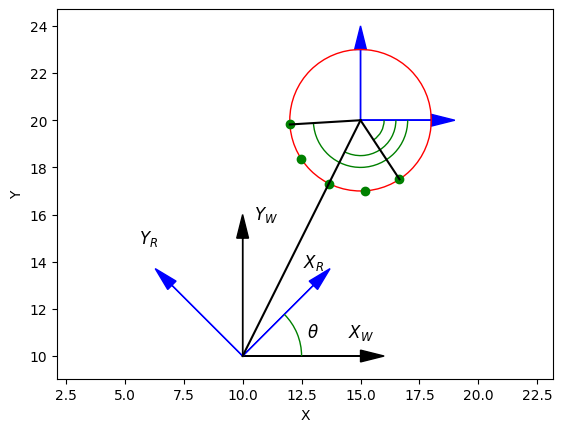

In [72]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

from factory_env.envs.parameters import env_param

params = env_param().sensor_param

fig, ax = plt.subplots()

# ax.spines['top'].set_color('none')
# ax.spines['right'].set_color('none')

# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')

# Define the point and position
circle = (15, 20, 3)
h, k, r = circle
pos = (10, 10, np.pi / 4)

# # Draw two perpendicular arrows at 'circle'
# ax.arrow(0, 0, 5, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')
# ax.arrow(0, 0, 0, 5, head_width=0.05, head_length=0.1, fc='black', ec='black')
# Draw two perpendicular arrows at 'pos'
ax.arrow(pos[0], pos[1], 5, 0, head_width=0.5, head_length=1, fc='black', ec='black')
ax.arrow(pos[0], pos[1], 0, 5, head_width=0.5, head_length=1, fc='black', ec='black')
ax.text(15, 11, r'$X_{W}$', fontsize=12, va='center', ha='center')
ax.text(11, 16, r'$Y_{W}$', fontsize=12, va='center', ha='center')

# Draw two perpendicular arrows at 'pos'
ax.arrow(pos[0], pos[1], 3, 3, head_width=0.5, head_length=1, fc='blue', ec='blue')
ax.arrow(pos[0], pos[1], -3, 3, head_width=0.5, head_length=1, fc='blue', ec='blue')
ax.text(13, 14, r'$X_{R}$', fontsize=12, va='center', ha='center')
ax.text(6, 15, r'$Y_{R}$', fontsize=12, va='center', ha='center')
# Draw two perpendicular arrows at 'point'
ax.arrow(circle[0], circle[1], 3, 0, head_width=0.5, head_length=1, fc='blue', ec='blue')
ax.arrow(circle[0], circle[1], 0, 3, head_width=0.5, head_length=1, fc='blue', ec='blue')


theta = np.arctan2(pos[1], pos[0])
# Add an arc for angle theta at 'pos'
arc = patches.Arc(pos, 5, 5, theta1=0, theta2=np.degrees(theta), color='green')
ax.add_patch(arc)
ax.text(13, 11, r'$\theta$', fontsize=12, va='center', ha='center')

# Obstacle
ax.add_patch(plt.Circle(circle[:2], r, color='r', fill=False))
# Plot a line from 'pos' to 'point'
ax.plot([pos[0], circle[0]], [pos[1], circle[1]], 'black')

# Arc2
angle_diff = np.arctan2(pos[1] - k, pos[0] - h)
print(np.degrees(angle_diff))
start_arc = np.degrees(angle_diff) % 360  # This ensures the angle is positive
end_arc = 360
arc2 = patches.Arc(circle[:2], 3, 3, theta1=start_arc, theta2=end_arc, color='green')
# ax.text(21, 18, r'$\theta_{diff}$', fontsize=12, va='center', ha='center')

# Arc3
start_angle = angle_diff - params.narrow_angle
start_arc = np.degrees(start_angle) % 360  # This ensures the angle is positive
arc3 = patches.Arc(circle[:2], 4, 4, theta1=start_arc, theta2=end_arc, color='green')
# ax.text(17.5, 20, r'$\theta_{start}$', fontsize=12, va='center', ha='center')

# Arc4
end_angle = angle_diff + params.narrow_angle
start_arc = np.degrees(end_angle) % 360  # This ensures the angle is positive
arc4 = patches.Arc(circle[:2], 2, 2, theta1=start_arc, theta2=end_arc, color='green')
# ax.text(21.5, 19, r'$\theta_{end}$', fontsize=12, va='center', ha='center')

ax.add_patch(arc2)
ax.add_patch(arc3)
ax.add_patch(arc4)

thetas = np.linspace(start_angle, end_angle, params.num_points_on_obstacles)
xs = h + r * np.cos(thetas)
ys = k + r * np.sin(thetas)

# plot black line from 'point' to each 'xs', 'ys'
ax.plot([circle[0], xs[0]], [circle[1], ys[0]], 'black')
ax.plot([circle[0], xs[-1]], [circle[1], ys[-1]], 'black')

ax.scatter(xs, ys, color='green')

# plot black line from 'pos' to each 'xs', 'ys'
# ax.plot([pos[0], xs[0]], [pos[1], ys[0]], 'black')
# ax.plot([pos[0], xs[1]], [pos[1], ys[1]], 'black')
# ax.plot([pos[0], xs[2]], [pos[1], ys[2]], 'black')
# ax.plot([pos[0], xs[3]], [pos[1], ys[3]], 'black')
# ax.plot([pos[0], xs[-1]], [pos[1], ys[-1]], 'black')


# Set labels for the axes
ax.set_xlim([10, 30])
ax.set_ylim([10, 30])
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Set aspect of the plot to be equal
ax.axis('equal')

# Show the plot
plt.show()


(-0.6324999999999998, 1.1825, -1.2033714933956108, 1.2033714933956106)

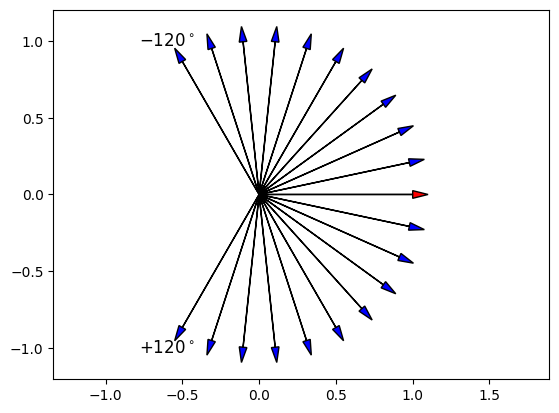

In [83]:
def draw_arrow(ax, x, y, angle, length=1, color='b', alpha=1.0):
            dx = length * np.cos(angle)
            dy = length * np.sin(angle)
            ax.arrow(x, y, dx, dy, head_width=0.05, head_length=0.1, fc=color, ec='black', alpha=alpha)

fig, ax = plt.subplots()
for angle in params.sectors:
        if angle == 0:
                draw_arrow(ax, 0.0, 0.0, angle, 1.0, color='r')
        else:
                draw_arrow(ax, 0.0, 0.0, angle, 1.0)

ax.text(-0.6, -1.0, r'$+120^\circ$', fontsize=12, va='center', ha='center')
ax.text(-0.6, 1, r'$-120^\circ$', fontsize=12, va='center', ha='center')

plt.axis('equal')
